In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
import geopandas as gpd
from shapely.geometry import Point
from bokeh.plotting import figure, output_notebook, show
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource
from ipywidgets import interact

In [4]:
# Notebook Styling 
sns.set()
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
global_deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
global_confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
global_recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [6]:
global_deaths_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26


In [7]:
global_confirmed_df.tail(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1


In [8]:
global_recovered_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327


In [9]:
def preprocess_covid_data(df=global_deaths_df):
    df=df.copy()
    df['location'] = df.apply(lambda x: f"{x['Province/State']}, {x['Country/Region']}" if pd.notnull(x['Province/State']) else x['Country/Region'], axis=1)
    locations_df = df[['location', 'Lat', 'Long']].copy()
    df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)
    df.set_index('location', inplace=True)
    df.index.name = None
    df = df.T
    df.reset_index(inplace=True)
    df.rename({'index':'date'}, axis=1, inplace=True)
    date_len = len(df.loc[0:0, 'date'][0])
    if date_len <= 7:
        df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
    else:
        df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
    return (locations_df, df)                            

In [10]:
death_locations, deaths_df = preprocess_covid_data(df=global_deaths_df)
confirmed_locations, confirmed_df = preprocess_covid_data(df=global_confirmed_df)
recovered_locations, recovered_df = preprocess_covid_data(df=global_recovered_df)

In [11]:
deaths_df.tail(3)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,"Alberta, Canada","British Columbia, Canada","Grand Princess, Canada","Manitoba, Canada","New Brunswick, Canada","Newfoundland and Labrador, Canada","Nova Scotia, Canada","Ontario, Canada","Prince Edward Island, Canada","Quebec, Canada","Saskatchewan, Canada",Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France","Martinique, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,"Diamond Princess, Canada",Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,"Recovered, Canada",Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,"Northwest Territories, Canada","Yukon, Canada",Kosovo,Burma,"Anguilla, United Kingdom","British Virgin Islands, United Kingdom","Turks and Caicos Islands, United Kingdom",MS Zaandam,Botswana,Burundi,Sierra Leone,"Bonaire, Sint Eustatius and Saba, Netherlands",Malawi,"Falkland Islands (Malvinas), United Kingdom","Saint Pierre and Miquelon, France",South Sudan,Western Sahara,Sao Tome and Principe,Yemen
87,2020-04-18,30,26,367,35,2,3,129,20,3,26,0,6,4,7,14,7,443,18,9,7,84,5,45,5453,1,0,31,47,2354,1,41,36,1,0,22,51,78,0,5,0,3,7,564,0,688,4,0,0,126,6,8,6,1,2,8,2,2,6,6,13,22,4,4512,4,1,0,1,1,2,0,0,0,3,7,7,0,3,3,0,3,2,1,153,6,25,4,8,39,13,32,12,181,0,0,346,2,217,456,224,7,0,0,38,1,3,0,90,0,0,8,4,0,0,0,2,8,19323,1,1,4,4459,9,110,7,3,6,3,0,46,172,9,521,535,5031,82,571,164,23

In [12]:
confirmed_df.tail(3)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,"Alberta, Canada","British Columbia, Canada","Grand Princess, Canada","Manitoba, Canada","New Brunswick, Canada","Newfoundland and Labrador, Canada","Nova Scotia, Canada","Ontario, Canada","Prince Edward Island, Canada","Quebec, Canada","Saskatchewan, Canada",Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France","Martinique, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,"Diamond Princess, Canada",Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,"Recovered, Canada",Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,"Northwest Territories, Canada","Yukon, Canada",Kosovo,Burma,"Anguilla, United Kingdom","British Virgin Islands, United Kingdom","Turks and Caicos Islands, United Kingdom",MS Zaandam,Botswana,Burundi,Sierra Leone,"Bonaire, Sint Eustatius and Saba, Netherlands",Malawi,"Falkland Islands (Malvinas), United Kingdom","Saint Pierre and Miquelon, France",South Sudan,Western Sahara,Sao Tome and Principe,Yemen
87,2020-04-18,933,548,2534,704,24,23,2758,1248,103,2926,28,1015,435,180,1319,541,14671,1373,55,1773,2144,75,4779,37183,35,5,493,1268,36658,137,878,565,58,122,1017,2562,1618,13,253,117,257,649,11013,26,17521,313,12,33,9730,991,593,579,355,139,1579,254,146,168,328,892,1276,1024,68128,1019,193,653,937,102,146,45,75,18,256,787,628,197,561,189,1,76,184,1268,3439,143,307,655,

In [13]:
recovered_df.tail(3)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Martinique, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Grenada,Greece,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,West Bank and Gaza,Laos,Kosovo,Burma,"Anguilla, United Kingdom","British Virgin Islands, United Kingdom","Turks and Caicos Islands, United Kingdom",MS Zaandam,Botswana,Burundi,Sierra Leone,"Bonaire, Sint Eustatius and Saba, Netherlands",Malawi,"Falkland Islands (Malvinas), United Kingdom","Saint Pierre and Miquelon, France",South Sudan,Western Sahara,Sao Tome and Principe,Yemen
87,2020-04-18,112,302,894,205,6,3,685,523,88,1379,9,738,331,67,1172,340,10214,590,10,755,66,17,342,8348,0,18,2,31,338,14026,113,153,321,1,103,177,10964,4,8,4035,984,509,570,336,137,1482,252,144,162,316,472,1254,568,63494,1015,104,643,936,97,142,17,75,18,252,765,512,135,553,173,1,73,177,1246,634,11,26,97,239,615,644,227,79,1227,173,11,3847,76,8,312,1008,701,43,4,3,162,8,16,0,1700,64,2,73,73,117,14,237,5,19,35983,7,2,86,85400,99,6,269,21,65,0,9,0,2,10,231,1291,2463,631,55987,953,77,3456,44927,25,1069,269,377,60,7937,280,130,88,99,7,11,55,228,601,35,3102,16,41,99,2,180,2125,391,22,5,55,314,4,6,2,44,11,12,250,867,6,113,166,164,32,176,1832,122,0,35,6684,516,981,610,510,1730,3057,69,0,11,1,60,1329,211,637,5,740,213,1

In [14]:
top_deaths = deaths_df.loc[:, deaths_df.columns != 'date'].tail(1).T
top_deaths.rename({top_deaths.columns[0]:'total'}, axis=1, inplace=True)
top_deaths.sort_values(by='total', ascending=False, inplace=True)
top_deaths.head(20)

,total
US,42094
Italy,24114
Spain,20852
France,20265
United Kingdom,16509
Belgium,5828
Iran,5209
Germany,4862
"Hubei, China",4512
Netherlands,3751


In [15]:
def plot_covid_19_data(location=None, case_type='Confirmed', y_type='log'):
    if case_type.lower() == 'fatal':
        df = deaths_df
    elif case_type.lower() == 'recovered':
        df = recovered_df
    else:
        df = confirmed_df
    
    nonzero_df = [False]
    nonzero_df.extend((df.sum(axis=0) > 0).tolist())
    nonzero_cols = ['date']
    nonzero_cols.extend(df.columns[nonzero_df])
    df = df[nonzero_cols].copy()

    
    if (location is None) and ('Cook County, IL, US' in list(df.columns)):
        location='Cook County, IL, US'
    else:
        location='US'
    
    cols = list(df.columns)
    cols.sort()
    locations = [col for col in cols if col != 'date']
    source = ColumnDataSource(df)
    date = source.data['date']
    location_data = source.data[location]
    plot = figure(x_axis_type='datetime', x_axis_label='Date', y_axis_label=f"{case_type} COVID-19 Cases", 
                  y_axis_type=y_type, title=f"{case_type} Cases of COVID-19 in {location}", plot_width=800, plot_height=500)
    line = plot.line(date, location_data)
        
    plot.title.text_font_size='18pt'
    plot.xaxis.axis_label_text_font_size = "16pt"
    plot.yaxis.axis_label_text_font_size = "16pt"
    
    plot.xaxis.axis_label_text_font_style = 'normal'
    plot.yaxis.axis_label_text_font_style = 'normal'
    
    plot.ygrid.minor_grid_line_color = 'black'
    plot.ygrid.minor_grid_line_alpha = 0.1
    
    output_notebook() 
    _ = show(plot, notebook_handle=True) 
    
    def update_covid_19_plot(location=location):
        plot.title.text = f"{case_type} Cases of COVID-19 in {location}"
        line.data_source.data['y'] = source.data[location]
        push_notebook()
    
    interact(update_covid_19_plot, location=locations)
       

In [16]:
plot_covid_19_data(case_type='Confirmed')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=242, options=('Afghanistan', 'Albania', 'Alberta,…

In [17]:
plot_covid_19_data(case_type='Confirmed', y_type='linear')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=242, options=('Afghanistan', 'Albania', 'Alberta,…

In [18]:
plot_covid_19_data(case_type='Fatal')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=193, options=('Afghanistan', 'Albania', 'Alberta,…

In [19]:
plot_covid_19_data(case_type='Recovered')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=222, options=('Afghanistan', 'Albania', 'Algeria'…

In [20]:
def plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China'], y_type='log', figsize=(12,8), y_scale_base=2):
    if case_type.lower() == 'confirmed':
        df = confirmed_df
    elif case_type.lower() == 'recovered':
        df = recovered_df
    else:
        df = deaths_df
        
    fig, ax = plt.subplots(figsize=figsize)
    for location in locations:
        ax = df.plot(x='date', y=location, ax=ax, linewidth=3)
    ax.set_yscale(y_type, basey=y_scale_base)
    ax.grid(b=True, which='both', axis='y')
    
    ax.set_title(f"{case_type} COVID-19 Cases", fontsize=18)
    ax.set_ylabel(f"Number of {case_type} COVID-19 Cases", fontsize=16)
    ax.set_xlabel('Date', fontsize=16)
    ax.legend(fontsize=16)
    ax.tick_params(which='both', labelsize=14)
    
    plt.tight_layout()

In [21]:
top_deaths = deaths_df.loc[:, deaths_df.columns != 'date'].tail(1).T
top_deaths.rename({top_deaths.columns[0]:'total'}, axis=1, inplace=True)
top_deaths.sort_values(by='total', ascending=False, inplace=True)
top_deaths.head(20)

,total
US,42094
Italy,24114
Spain,20852
France,20265
United Kingdom,16509
Belgium,5828
Iran,5209
Germany,4862
"Hubei, China",4512
Netherlands,3751


In [22]:
deaths_df.head(2)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,"Alberta, Canada","British Columbia, Canada","Grand Princess, Canada","Manitoba, Canada","New Brunswick, Canada","Newfoundland and Labrador, Canada","Nova Scotia, Canada","Ontario, Canada","Prince Edward Island, Canada","Quebec, Canada","Saskatchewan, Canada",Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France","Martinique, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,"Diamond Princess, Canada",Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,"Recovered, Canada",Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,"Northwest Territories, Canada","Yukon, Canada",Kosovo,Burma,"Anguilla, United Kingdom","British Virgin Islands, United Kingdom","Turks and Caicos Islands, United Kingdom",MS Zaandam,Botswana,Burundi,Sierra Leone,"Bonaire, Sint Eustatius and Saba, Netherlands",Malawi,"Falkland Islands (Malvinas), United Kingdom","Saint Pierre and Miquelon, France",South Sudan,Western Sahara,Sao Tome and Principe,Yemen
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

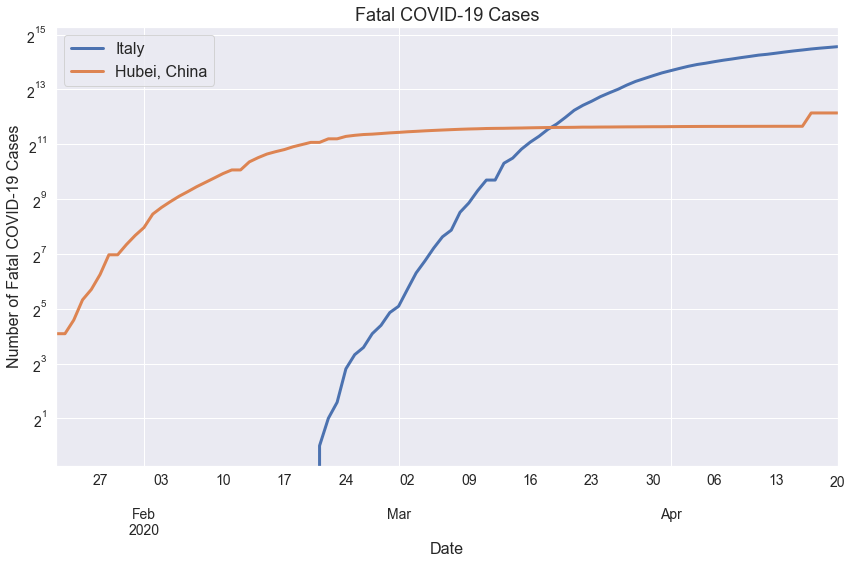

In [23]:
plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China'])

<ipython-input-20-0a9a670fe36b>:12: MatplotlibDeprecationWarning: ScaleBase got an unexpected keyword argument 'basey'. In the future this will raise TypeError
  ax.set_yscale(y_type, basey=y_scale_base)


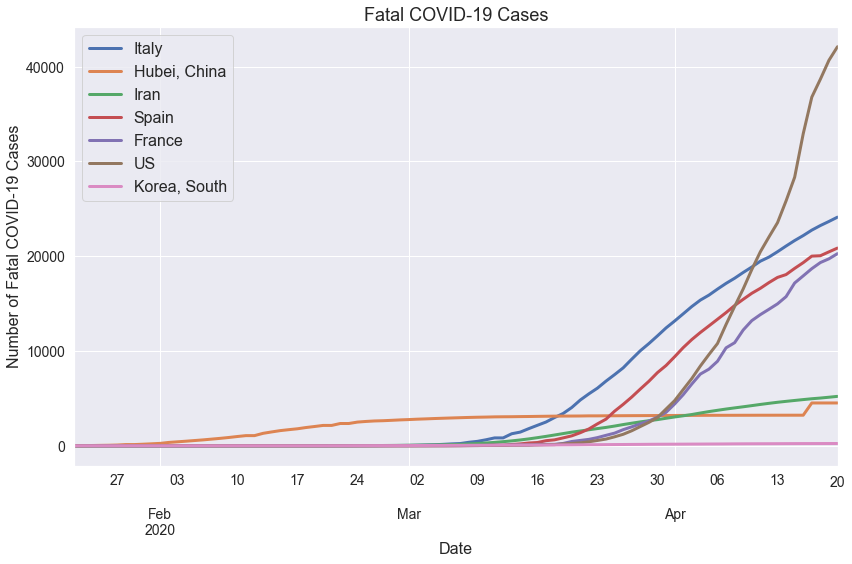

In [24]:
plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US', 'Korea, South'], y_type='linear')

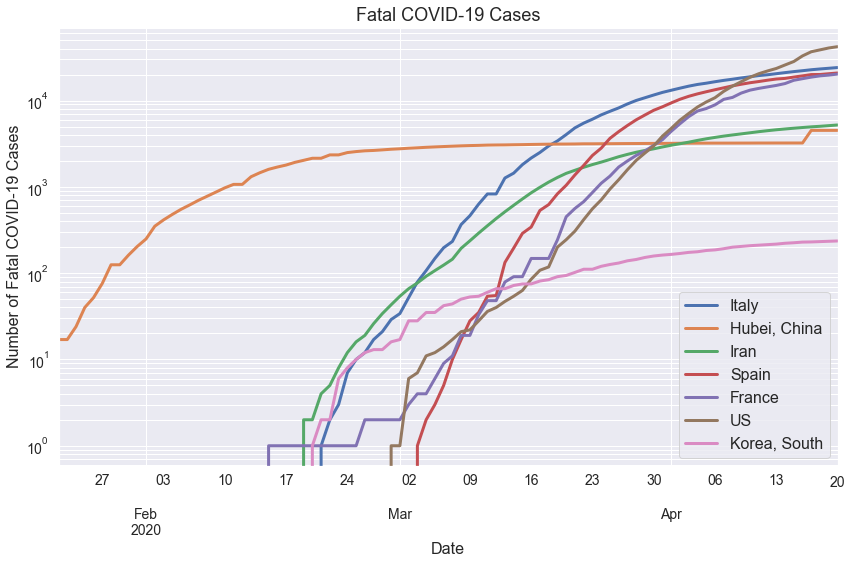

In [25]:
plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US', 'Korea, South'], y_type='log', y_scale_base=10)

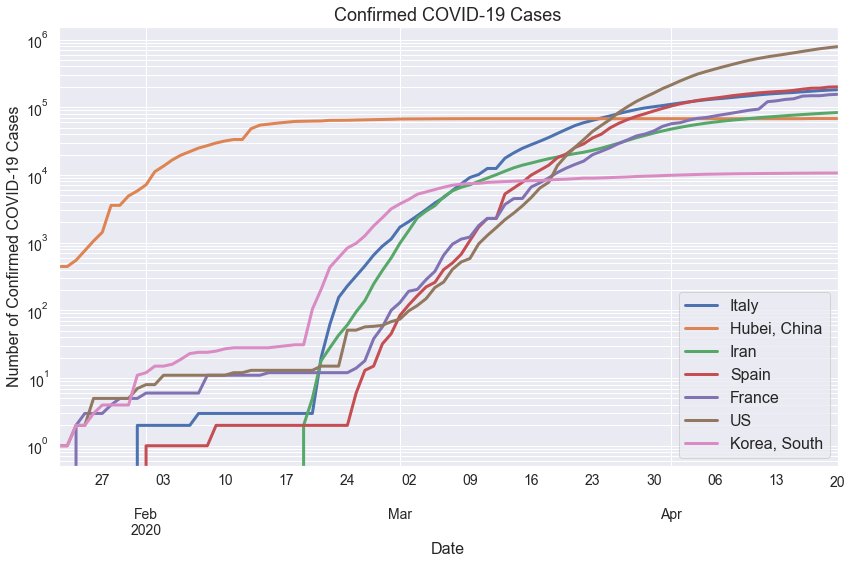

In [26]:
plot_covid_19_data_mpl(case_type='Confirmed', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US', 'Korea, South'], y_type='log', y_scale_base=10)

In [304]:
# Plotting in log_base_2 scale
# plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US', 'Korea, South'], y_type='log', y_scale_base=2)

# Days since X [cases, deaths, recoveries] Plots

In [27]:
deaths_df.head(2)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,"Alberta, Canada","British Columbia, Canada","Grand Princess, Canada","Manitoba, Canada","New Brunswick, Canada","Newfoundland and Labrador, Canada","Nova Scotia, Canada","Ontario, Canada","Prince Edward Island, Canada","Quebec, Canada","Saskatchewan, Canada",Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France","Martinique, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,"Diamond Princess, Canada",Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,"Recovered, Canada",Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,"Northwest Territories, Canada","Yukon, Canada",Kosovo,Burma,"Anguilla, United Kingdom","British Virgin Islands, United Kingdom","Turks and Caicos Islands, United Kingdom",MS Zaandam,Botswana,Burundi,Sierra Leone,"Bonaire, Sint Eustatius and Saba, Netherlands",Malawi,"Falkland Islands (Malvinas), United Kingdom","Saint Pierre and Miquelon, France",South Sudan,Western Sahara,Sao Tome and Principe,Yemen
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [318]:
thresh=100
first_date_over_thresh = {}
df=deaths_df
for col in [col for col in df.columns if 'date' not in col]:
    if df[col].max() >= thresh:
        print(f"country: {col},  max val: {df[col].max()}")
        over_thresh_df = df.loc[df[col] >= thresh, [col, 'date']]
        over_thresh_df.reset_index(drop=True, inplace=True)
        print(over_thresh_df.loc[0, 'date'].date())
        first_date_over_thresh[col] = over_thresh_df.loc[0, 'date'].date()


country: Belgium,  max val: 431
2020-03-24
country: Brazil,  max val: 136
2020-03-28
country: Hubei, China,  max val: 3182
2020-01-28
country: France,  max val: 2606
2020-03-16
country: Germany,  max val: 533
2020-03-23
country: Indonesia,  max val: 114
2020-03-28
country: Iran,  max val: 2640
2020-03-05
country: Italy,  max val: 10779
2020-03-04
country: Korea, South,  max val: 152
2020-03-21
country: Netherlands,  max val: 771
2020-03-20
country: Portugal,  max val: 119
2020-03-28
country: Spain,  max val: 6803
2020-03-13
country: Sweden,  max val: 110
2020-03-27
country: Switzerland,  max val: 300
2020-03-23
country: Turkey,  max val: 131
2020-03-28
country: United Kingdom,  max val: 1228
2020-03-19
country: US,  max val: 2467
2020-03-17


In [319]:
first_date_over_thresh

{'Belgium': datetime.date(2020, 3, 24),
 'Brazil': datetime.date(2020, 3, 28),
 'Hubei, China': datetime.date(2020, 1, 28),
 'France': datetime.date(2020, 3, 16),
 'Germany': datetime.date(2020, 3, 23),
 'Indonesia': datetime.date(2020, 3, 28),
 'Iran': datetime.date(2020, 3, 5),
 'Italy': datetime.date(2020, 3, 4),
 'Korea, South': datetime.date(2020, 3, 21),
 'Netherlands': datetime.date(2020, 3, 20),
 'Portugal': datetime.date(2020, 3, 28),
 'Spain': datetime.date(2020, 3, 13),
 'Sweden': datetime.date(2020, 3, 27),
 'Switzerland': datetime.date(2020, 3, 23),
 'Turkey': datetime.date(2020, 3, 28),
 'United Kingdom': datetime.date(2020, 3, 19),
 'US': datetime.date(2020, 3, 17)}

In [323]:
list(first_date_over_thresh.keys())

['Belgium',
 'Brazil',
 'Hubei, China',
 'France',
 'Germany',
 'Indonesia',
 'Iran',
 'Italy',
 'Korea, South',
 'Netherlands',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'US']

In [343]:
countries_over_thresh = ['date']
countries_over_thresh.extend(list(first_date_over_thresh.keys()))
countries_over_thresh_df = df[countries_over_thresh].copy()
countries_over_thresh_df

,date,Belgium,Brazil,"Hubei, China",France,Germany,Indonesia,Iran,Italy,"Korea, South",Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,United Kingdom,US
0,2020-01-22,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020-03-25,178,59,3163,1331,206,58,2077,7503,126,356,43,3647,62,153,59,465,942
64,2020-03-26,220,77,3169,1696,267,78,2234,8215,131,434,60,4365,77,191,75,578,1209
65,2020-03-27,289,92,3174,1995,342,87,2378,9134,139,546,76,5138,105,231,92,759,1581
66,2020-03-28,353,111,3177,2314,433,102,2517,10023,144,639,100,5982,105,264,108,1019,2026


In [344]:
col = 'US'
countries_over_thresh_df[f"{col}_days_past"] = countries_over_thresh_df['date'].dt.date - first_date_over_thresh[col]

In [352]:
pd.Timedelta(days=0)

Timedelta('0 days 00:00:00')

In [354]:
countries_over_thresh_df.loc[countries_over_thresh_df[f"{col}_days_past"] < pd.Timedelta(days=0), f"{col}_days_past"] = pd.Timedelta(days=0)

In [359]:
countries_over_thresh_df[f"{col}_days_past"] = countries_over_thresh_df[f"{col}_days_past"].dt.days

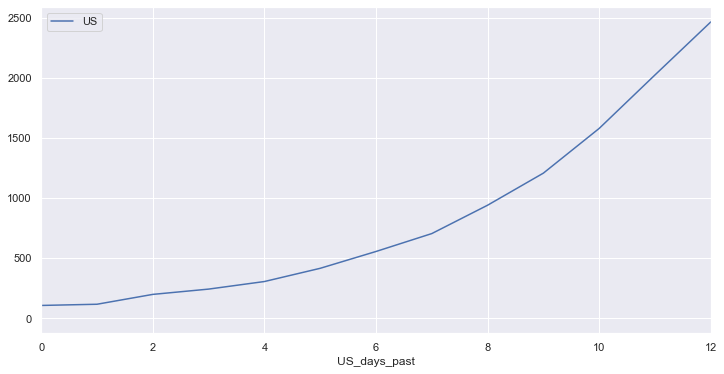

In [360]:
figsize=(12,6)

fig, ax = plt.subplots(figsize=figsize)
# for location in locations:
#     ax = df.plot(x='date', y=location, ax=ax, linewidth=3)
# ax.set_yscale(y_type, basey=y_scale_base)
# ax.grid(b=True, which='both', axis='y')

countries_over_thresh_df.plot(x='US_days_past', y='US', ax=ax)

In [412]:
thresh=100
first_date_over_thresh = {}
df=deaths_df

for col in [col for col in df.columns if 'date' not in col]:
    if df[col].max() >= thresh:        
        over_thresh_df = df.loc[df[col] >= thresh, [col, 'date']]
        over_thresh_df.reset_index(drop=True, inplace=True)
        first_date_over_thresh[col] = over_thresh_df.loc[0, 'date'].date()
        
countries_over_thresh = ['date']
countries_over_thresh.extend(list(first_date_over_thresh.keys()))
countries_over_thresh_df = df[countries_over_thresh].copy()
new_order = ['date']

for col in [col for col in countries_over_thresh_df.columns if 'date' not in col]:
    countries_over_thresh_df[f"{col}_days_past"] = countries_over_thresh_df['date'].dt.date - first_date_over_thresh[col]
#     countries_over_thresh_df.loc[countries_over_thresh_df[f"{col}_days_past"] < pd.Timedelta(days=0), f"{col}_days_past"] = pd.Timedelta(days=0)
    countries_over_thresh_df[f"{col}_days_past"] = countries_over_thresh_df[f"{col}_days_past"].dt.days + 1
    new_order.extend([col, f"{col}_days_past"])
    
countries_over_thresh_df = countries_over_thresh_df[new_order]

In [413]:
countries_over_thresh_df.tail(10)

,date,Belgium,Belgium_days_past,Brazil,Brazil_days_past,"Hubei, China","Hubei, China_days_past",France,France_days_past,Germany,Germany_days_past,Indonesia,Indonesia_days_past,Iran,Iran_days_past,Italy,Italy_days_past,"Korea, South","Korea, South_days_past",Netherlands,Netherlands_days_past,Portugal,Portugal_days_past,Spain,Spain_days_past,Sweden,Sweden_days_past,Switzerland,Switzerland_days_past,Turkey,Turkey_days_past,United Kingdom,United Kingdom_days_past,US,US_days_past
58,2020-03-20,37,-3,11,-7,3133,53,450,5,67,-2,32,-7,1433,16,4032,17,94,0,106,1,6,-7,1043,8,16,-6,54,-2,4,-7,177,2,244,4
59,2020-03-21,67,-2,15,-6,3139,54,562,6,84,-1,38,-6,1556,17,4825,18,102,1,136,2,12,-6,1375,9,20,-5,75,-1,9,-6,233,3,307,5
60,2020-03-22,75,-1,25,-5,3153,55,674,7,94,0,48,-5,1685,18,5476,19,111,2,179,3,14,-5,1772,10,21,-4,98,0,30,-5,281,4,417,6
61,2020-03-23,88,0,34,-4,3153,56,860,8,123,1,49,-4,1812,19,6077,20,111,3,213,4,23,-4,2311,11,25,-3,120,1,37,-4,335,5,557,7
62,2020-03-24,122,1,46,-3,3160,57,1100,9,157,2,55,-3,1934,20,6820,21,120,4,276,5,33,-3,2808,12,36,-2,122,2,44,-3,422,6,706,8
63,2020-03-25,178,2,59,-2,3163,58,1331,10,206,3,58,-2,2077,21,7503,22,126,5,356,6,43,-2,3647,13,62,-1,153,3,59,-2,465,7,942,9
64,2020-03-26,220,3,77,-1,3169,59,1696,11,267,4,78,-1,2234,22,8215,23,131,6,434,7,60,-1,4365,14,77,0,191,4,75,-1,578,8,1209,10
65,2020-03-27,289,4,92,0,3174,60,1995,12,342,5,87,0,2378,23,9134,24,139,7,546,8,76,0,5138,15,105,1,231,5,92,0,759,9,1581,11
66,2020-03-28,353,5,111,1,3177,61,2314,13,433,6,102,1,2517,24,10023,25,144,8,639,9,100,1,5982,16,105,2,264,6,108,1,1019,10,2026,12
67,2020-03-29,431,6,136,2,3182,62,2606,14,533,7,114,2,2640,25,10779,26,152,9,771,10,119,2,6803,17,110,3,300,7,131,2,1228,11,2467,13


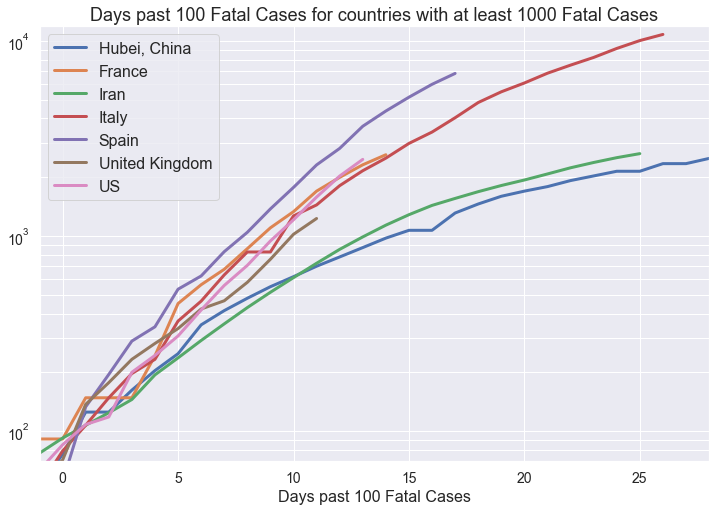

In [428]:
figsize=(12,8)
df=countries_over_thresh_df
total_thresh=1000
fig, ax = plt.subplots(figsize=figsize)
y_type='log'
y_scale_base=10
locations=None
case_type='Fatal'

max_total = 0
max_days = 0

if locations is None:
    locations = [col.split('_')[0] for col in days_since_100_deaths_df.columns if '_' in col]

for country in locations:
    if df[country].max() >= total_thresh:
        ax = df.plot(x=f"{country}_days_past", y=country, ax=ax, linewidth=3)
        if df[country].max() >= max_total:
            max_total = df[country].max()
            max_days = df[f"{country}_days_past"].max()

ax.set_title(f"Days past {thresh} {case_type} Cases for countries with at least {total_thresh} {case_type} Cases", fontsize=18)
ax.set_yscale(y_type, basey=y_scale_base)
ax.grid(b=True, which='both', axis='y')
ax.set_xlim([-1, max_days + 2])
ax.set_ylim([0.7*thresh, max_total*1.1])
ax.set_xlabel(f"Days past {thresh} {case_type} Cases", fontsize=16)
ax.legend(fontsize=16)
ax.tick_params(which='both', labelsize=14)

In [32]:
def get_days_since_threshold_df(df, thresh=100):
    first_date_over_thresh = {}    
    
    for col in [col for col in df.columns if 'date' not in col]:
        if df[col].max() >= thresh:        
            over_thresh_df = df.loc[df[col] >= thresh, [col, 'date']]
            over_thresh_df.reset_index(drop=True, inplace=True)
            first_date_over_thresh[col] = over_thresh_df.loc[0, 'date'].date()
            
    countries_over_thresh = ['date']
    countries_over_thresh.extend(list(first_date_over_thresh.keys()))
    countries_over_thresh_df = df[countries_over_thresh].copy()
    new_order = ['date']
    
    for col in [col for col in countries_over_thresh_df.columns if 'date' not in col]:
        countries_over_thresh_df[f"{col}_days_past"] = countries_over_thresh_df['date'].dt.date - first_date_over_thresh[col]
#         countries_over_thresh_df.loc[countries_over_thresh_df[f"{col}_days_past"] < pd.Timedelta(days=0), f"{col}_days_past"] = pd.Timedelta(days=0)
        countries_over_thresh_df[f"{col}_days_past"] = countries_over_thresh_df[f"{col}_days_past"].dt.days + 1
        new_order.extend([col, f"{col}_days_past"])
        
    return countries_over_thresh_df[new_order]

In [33]:
def plot_days_past_threshold(case_type='Fatal', thresh=100, total_thresh=1000, y_type='log', 
                             y_scale_base=10, locations=None, figsize=(12,8)):
    
    if case_type == 'Confirmed':
        df=get_days_since_threshold_df(df=confirmed_df, thresh=thresh)
    elif case_type == 'Recovered':
        df=get_days_since_threshold_df(df=recovered_df, thresh=thresh)
    else:
        df=get_days_since_threshold_df(df=deaths_df, thresh=thresh)
    max_total = 0
    max_days = 0
    
    if locations is None:
        locations = [col.split('_')[0] for col in df.columns if '_' in col]
    
    fig, ax = plt.subplots(figsize=figsize)
    for country in locations:
        if df[country].max() >= total_thresh:
            ax = df.plot(x=f"{country}_days_past", y=country, ax=ax, linewidth=3)
            if df[country].max() >= max_total:
                max_total = df[country].max()
                max_days = df[f"{country}_days_past"].max()
                
    ax.set_title(f"Days past {thresh} {case_type} Cases for countries with at least {total_thresh} {case_type} Cases", fontsize=18)
    ax.set_yscale(y_type, basey=y_scale_base)
    ax.grid(b=True, which='both', axis='y')
    ax.set_xlim([-1, max_days + 2])
    ax.set_ylim([0.7*thresh, max_total*1.1])
    ax.set_xlabel(f"Days past {thresh} {case_type} Cases", fontsize=16)
    ax.legend(fontsize=16)
    ax.tick_params(which='both', labelsize=14)

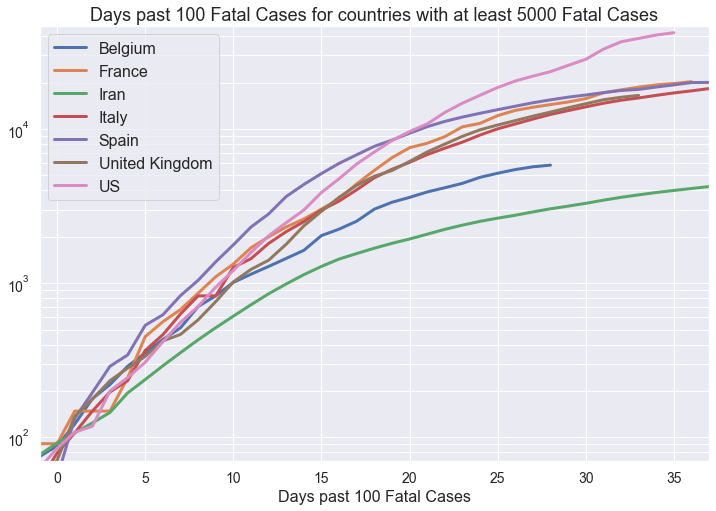

In [34]:
plot_days_past_threshold(case_type='Fatal', thresh=100, total_thresh=5000, y_type='log', 
                             y_scale_base=10, locations=None, figsize=(12,8))

<ipython-input-33-396218ed62ea>:25: MatplotlibDeprecationWarning: ScaleBase got an unexpected keyword argument 'basey'. In the future this will raise TypeError
  ax.set_yscale(y_type, basey=y_scale_base)


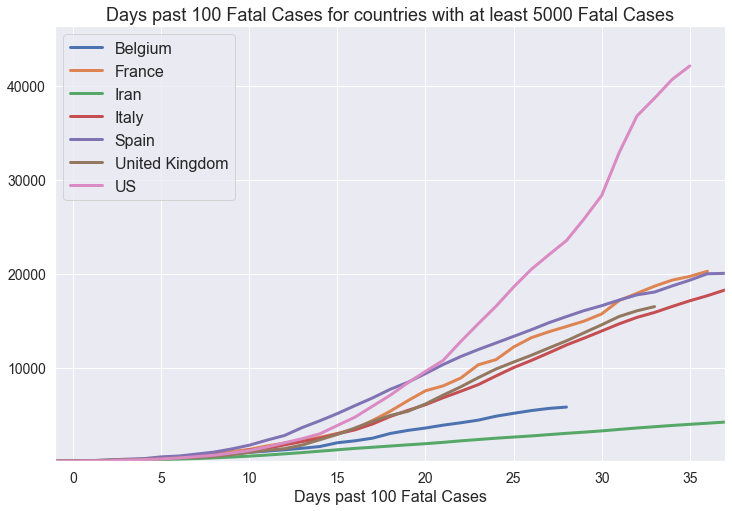

In [36]:
plot_days_past_threshold(case_type='Fatal', thresh=100, total_thresh=5000, y_type='linear', 
                             y_scale_base=10, locations=None, figsize=(12,8))

# Maps

In [26]:
today = pd.to_datetime('today')
today_str = today.date().strftime('%m-%d-%Y')
world_covid_df = pd.read_csv(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{today_str}.csv')
world_covid_df['geometry'] = world_covid_df.apply(lambda x: Point(x['Long_'], x['Lat']), axis=1)
world_covid_df = gpd.GeoDataFrame(world_covid_df)

In [27]:
world_covid_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,geometry
0,45001.0,Abbeville,South Carolina,US,2020-04-08 22:51:58,34.223334,-82.461707,5,0,0,0,"Abbeville, South Carolina, US",POINT (-82.46171 34.22333)
1,22001.0,Acadia,Louisiana,US,2020-04-08 22:51:58,30.295065,-92.414197,86,2,0,0,"Acadia, Louisiana, US",POINT (-92.41420 30.29506)
2,51001.0,Accomack,Virginia,US,2020-04-08 22:51:58,37.767072,-75.632346,11,0,0,0,"Accomack, Virginia, US",POINT (-75.63235 37.76707)
3,16001.0,Ada,Idaho,US,2020-04-08 22:51:58,43.452658,-116.241552,438,3,0,0,"Ada, Idaho, US",POINT (-116.24155 43.45266)
4,19001.0,Adair,Iowa,US,2020-04-08 22:51:58,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US",POINT (-94.47106 41.33076)


In [36]:
# [col for col in world_covid_df['Province_State'] if 'North' in col]

nc_values = world_covid_df.loc[world_covid_df['Province_State'].str.contains('North Car', na=False)].copy()
nc_values.reset_index(drop=True, inplace=True)
nc_values.groupby(['Province_State'])[['Confirmed', 'Deaths']].sum()

,Confirmed,Deaths
Province_State,,
North Carolina,3499,66


In [232]:
world_covid_df.loc[world_covid_df['Country_Region'] == 'US'].sort_values(by=['Confirmed'], ascending=[False]).head(20)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,geometry
2066,36061.0,New York City,New York,US,2020-03-26 23:48:35,40.767273,-73.971526,21873,281,0,0,"New York City, New York, US",POINT (-73.97153 40.76727)
3046,36119.0,Westchester,New York,US,2020-03-26 23:48:35,41.162784,-73.757417,5944,1,0,0,"Westchester, New York, US",POINT (-73.75742 41.16278)
2045,36059.0,Nassau,New York,US,2020-03-26 23:48:35,40.740665,-73.589419,3914,17,0,0,"Nassau, New York, US",POINT (-73.58942 40.74067)
2720,36103.0,Suffolk,New York,US,2020-03-26 23:48:35,40.883201,-72.801217,2735,22,0,0,"Suffolk, New York, US",POINT (-72.80122 40.88320)
1505,53033.0,King,Washington,US,2020-03-26 23:48:35,47.491379,-121.834613,1577,109,0,0,"King, Washington, US",POINT (-121.83461 47.49138)
2867,NaN,Unassigned,New Jersey,US,2020-03-26 23:48:35,0.000000,0.000000,1478,63,0,0,"Unassigned, New Jersey, US",POINT (0.00000 0.00000)
628,17031.0,Cook,Illinois,US,2020-03-26 23:48:35,41.841448,-87.816588,1418,18,0,0,"Cook, Illinois, US",POINT (-87.81659 41.84145)
3017,26163.0,Wayne,Michigan,US,2020-03-26 23:48:35,42.280984,-83.281255,1389,26,0,0,"Wayne, Michigan, US",POINT (-83.28126 42.28098)
1716,6037.0,Los Angeles,California,US,2020-03-26 23:48:35,34.308284,-118.228241,1229,21,0,0,"Los Angeles, California, US",POINT (-118.22824 34.30828)
190,34003.0,Bergen,New Jersey,US,2020-03-26 23:48:35,40.960109,-74.071643,1206,6,0,0,"Bergen, New Jersey, US",POINT (-74.07164 40.96011)


In [233]:
world_covid_df.crs

In [234]:
world_gdf.crs

{'init': 'epsg:4326'}

In [241]:
WORLD_SHAPEFILE = os.path.join('zip://', 'shapefiles', 'ne_50m_admin_0_countries_lakes.zip')
world_gdf = gpd.read_file(WORLD_SHAPEFILE)

In [242]:
world_gdf.crs

{'init': 'epsg:4326'}

In [243]:
us_covid_df.head(2)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,geometry
0,45001.0,Abbeville,South Carolina,US,2020-03-26 23:48:35,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US",POINT (-82.46171 34.22333)
1,22001.0,Acadia,Louisiana,US,2020-03-26 23:48:35,30.295065,-92.414197,3,0,0,0,"Acadia, Louisiana, US",POINT (-92.41420 30.29506)


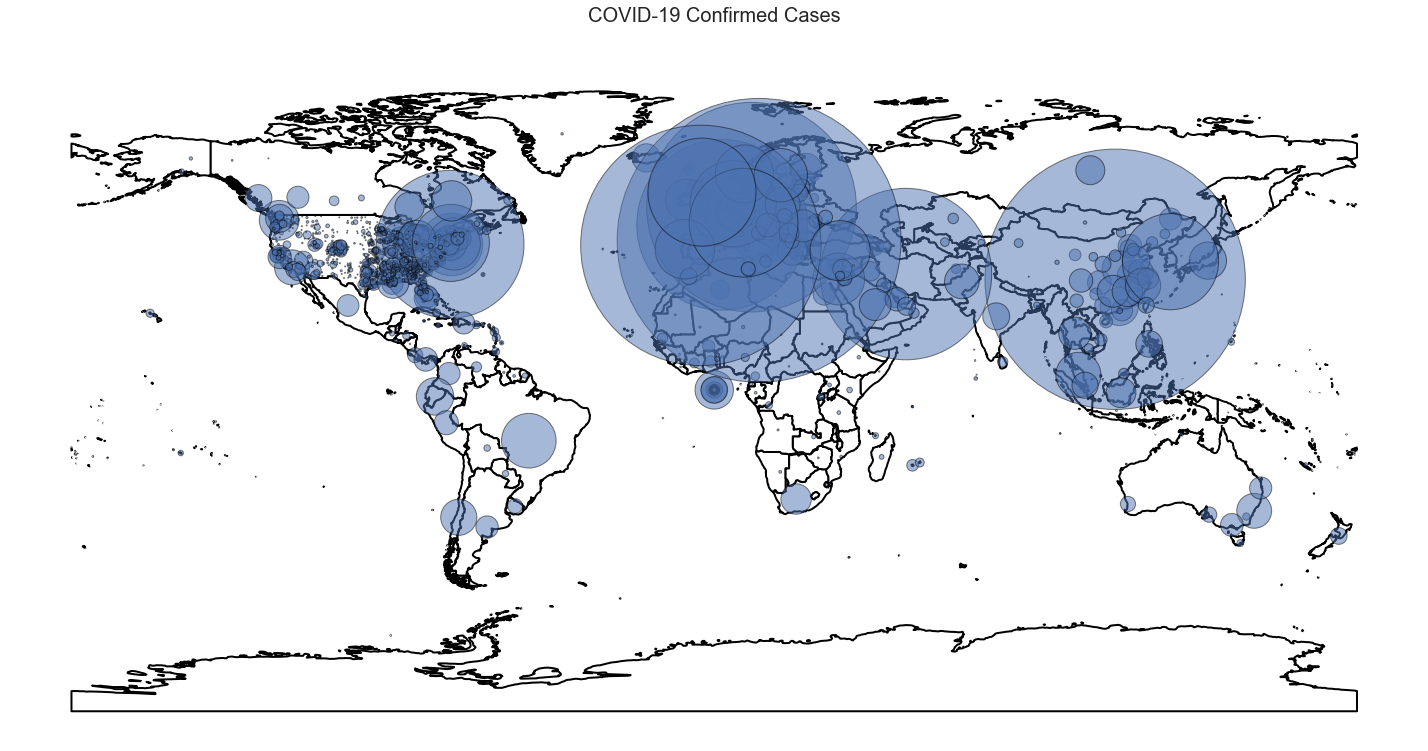

In [251]:
figsize=(20,15)
fig, ax = plt.subplots(figsize=figsize)
base = world_gdf.plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = world_covid_df.plot(markersize=world_covid_df['Confirmed'], edgecolor='black', alpha=0.5, ax=ax)
_ = ax.axis('off')
ax.set_title('COVID-19 Confirmed Cases', fontsize=20)
plt.tight_layout()

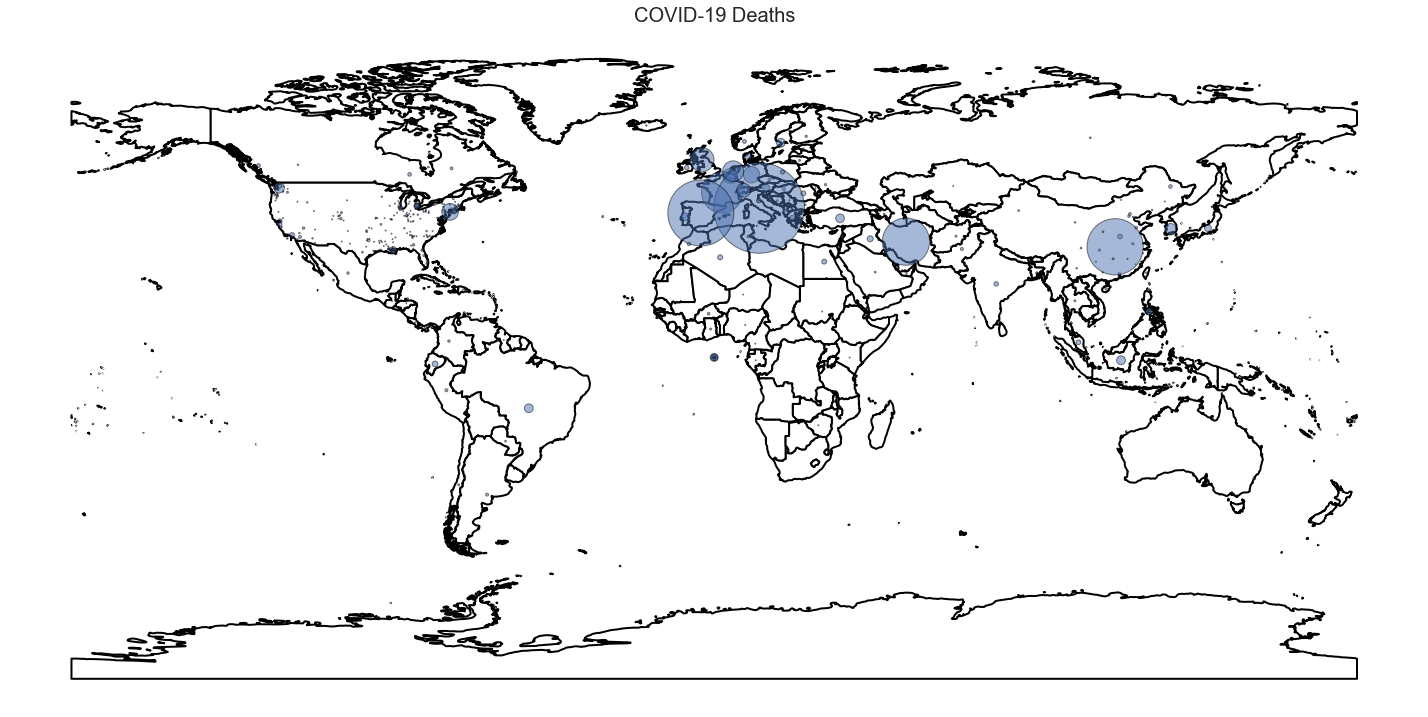

In [252]:
figsize=(20,15)
fig, ax = plt.subplots(figsize=figsize)
base = world_gdf.plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = world_covid_df.plot(markersize=world_covid_df['Deaths'], edgecolor='black', alpha=0.5, ax=ax)
_ = ax.axis('off')
ax.set_title('COVID-19 Deaths', fontsize=20)
plt.tight_layout()

In [253]:
world_covid_df.head(2)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,geometry
0,45001.0,Abbeville,South Carolina,US,2020-03-26 23:48:35,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US",POINT (-82.46171 34.22333)
1,22001.0,Acadia,Louisiana,US,2020-03-26 23:48:35,30.295065,-92.414197,3,0,0,0,"Acadia, Louisiana, US",POINT (-92.41420 30.29506)


In [258]:
world_covid_df['Country_Region'].value_counts().head(20)

US                    3174
China                   33
Canada                  15
France                  10
Australia                8
United Kingdom           7
Netherlands              4
Denmark                  3
Ethiopia                 1
Zimbabwe                 1
Belize                   1
Russia                   1
Montenegro               1
Congo (Kinshasa)         1
Kyrgyzstan               1
Gambia                   1
Dominican Republic       1
Namibia                  1
Spain                    1
Afghanistan              1
Name: Country_Region, dtype: int64

In [254]:
world_gdf.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,Zimbabwe,ZWE,Zimbabwe,None,Zimb.,ZW,Republic of Zimbabwe,None,Zimbabwe,None,None,Zimbabwe,None,1,5,3,9,13805084,14,28330.0,2017,2002,2016,5. Emerging region: G20,5. Low income,-99,ZI,ZW,ZWE,ZWE,716,716,ZW,ZWE,23425004,23425004,Exact WOE match as country,ZWE,ZWE,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,1159321441,Q954,زيمبابوي,জিম্বাবুয়ে,Simbabwe,Zimbabwe,Zimbabue,Zimbabwe,Ζιμπάμπουε,ज़िम्बाब्वे,Zimbabwe,Zimbabwe,Zimbabwe,ジンバブエ,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,"MULTIPOLYGON (((31.28789 -22.40205, 31.19727 -..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,Zambia,ZMB,Zambia,None,Zambia,ZM,Republic of Zambia,None,Zambia,None,None,Zambia,None,5,8,5,13,15972000,14,65170.0,2017,2010,2016,7. Least developed region,4. Lower middle income,-99,ZA,ZM,ZMB,ZMB,894,894,ZM,ZMB,23425003,23425003,Exact WOE match as country,ZMB,ZMB,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,0.0,3.0,8.0,1159321439,Q953,زامبيا,জাম্বিয়া,Sambia,Zambia,Zambia,Zambie,Ζάμπια,ज़ाम्बिया,Zambia,Zambia,Zambia,ザンビア,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"MULTIPOLYGON (((30.39609 -15.64307, 30.25068 -..."


In [256]:
world_gdf.loc[(world_gdf['CONTINENT'] == 'North America')]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
12,Admin-0 country,3,6,United States of America,US1,1,2,Dependency,United States Virgin Islands,VIR,0,United States Virgin Islands,VIR,0,United States Virgin Islands,VIR,0,U.S. Virgin Is.,United States Virgin Islands,VIR,U.S. Virgin Is.,None,V.I. (U.S.),VI,Virgin Islands of the United States,None,Virgin Islands,U.S.A.,None,Virgin Islands (U.S.),None,4,5,1,1,107268,9,3792.0,2017,2010,2013,6. Developing region,2. High income: nonOECD,-99,VQ,VI,VIR,VIR,850,850,VI,VIR,23424985,23424985,Exact WOE match as country,VIR,VIR,-99,-99,North America,Americas,Caribbean,Latin America & Caribbean,15,28,11,3,-99,0.0,5.0,10.0,1159321371,Q11703,جزر العذراء الأمريكية,মার্কিন ভার্জিন দ্বীপপুঞ্জ,Amerikanische Jungferninseln,United States Virgin Islands,Islas Vírgenes de los Estados Unidos,îles Vierges des États-Unis,Αμερικανικές Παρθένοι Νήσοι,संयुक्त राज्य वर्जिन द्वीपसमूह,Amerikai Virgin-szigetek,Kepulauan Virgin Amerika Serikat,Isole Vergini americane,アメリカ領ヴァージン諸島,미국령 버진아일랜드,Amerikaanse Maagdeneilanden,Wyspy Dziewicze Stanów Zjednoczonych,Ilhas Virgens Americanas,Американские Виргинские острова,Amerikanska Jungfruöarna,ABD Virjin Adaları,Quần đảo Virgin thuộc Mỹ,美屬維爾京群島,"MULTIPOLYGON (((-64.84502 18.33008, -64.91997 ..."
15,Admin-0 country,1,5,United States of America,US1,1,2,Dependency,Puerto Rico,PRI,0,Puerto Rico,PRI,0,Puerto Rico,PRI,0,Puerto Rico,Puerto Rico,PRI,Puerto Rico,None,P.R.,PR,Commonwealth of Puerto Rico,None,Puerto Rico,Commonwealth of U.S.A.,None,Puerto Rico,None,4,5,1,1,3351827,12,131000.0,2017,2010,2016,6. Developing region,2. High income: nonOECD,-99,RQ,PR,PRI,PRI,630,630,PR,PRI,23424935,23424935,Exact WOE match as country,PRI,PRI,-99,-99,North America,Americas,Caribbean,Latin America & Caribbean,11,11,4,-99,-99,0.0,3.0,8.0,1159321363,Q1183,بورتوريكو,পুয়ের্তো রিকো,Puerto Rico,Puerto Rico,Puerto Rico,Porto Rico,Πουέρτο Ρίκο,प्युर्तो रिको,Puerto Rico,Puerto Riko,Porto Rico,プエルトリコ,푸에르토리코,Puerto Rico,Portoryko,Porto Rico,Пуэрто-Рико,Puerto Rico,Porto Riko,Puerto Rico,波多黎各,"MULTIPOLYGON (((-66.12939 18.44492, -66.09849 ..."
16,Admin-0 country,5,2,United States of America,US1,1,2,Country,United States of America,USA,0,United States of America,USA,0,United States,USA,0,United States of America,United States,USA,United States,None,U.S.A.,US,United States of America,None,United States,None,None,United States of America,None,4,5,1,1,326625791,17,18560000.0,2017,2010,2016,1. Developed region: G7,1. High income: OECD,0,US,US,USA,USA,840,840,US,USA,23424977,23424977,Exact WOE match as country,USA,USA,-99,-99,North America,Americas,Northern America,North America,24,13,6,-99,1,0.0,1.7,5.7,1159321369,Q30,الولايات المتحدة,মার্কিন যুক্তরাষ্ট্র,Vereinigte Staaten,United States of America,Estados Unidos,États-Unis,Ηνωμένες Πολιτείες Αμερικής,संयुक्त राज्य अमेरिका,Amerikai Egyesült Államok,Amerika Serikat,Stati Uniti d'America,アメリカ合衆国,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."
21,Admin-0 country,1,6,United Kingdom,GB1,1,2,Dependency,Anguilla,AIA,0,Anguilla,AIA,0,Anguilla,AIA,0,Anguilla,Anguilla,AIA,

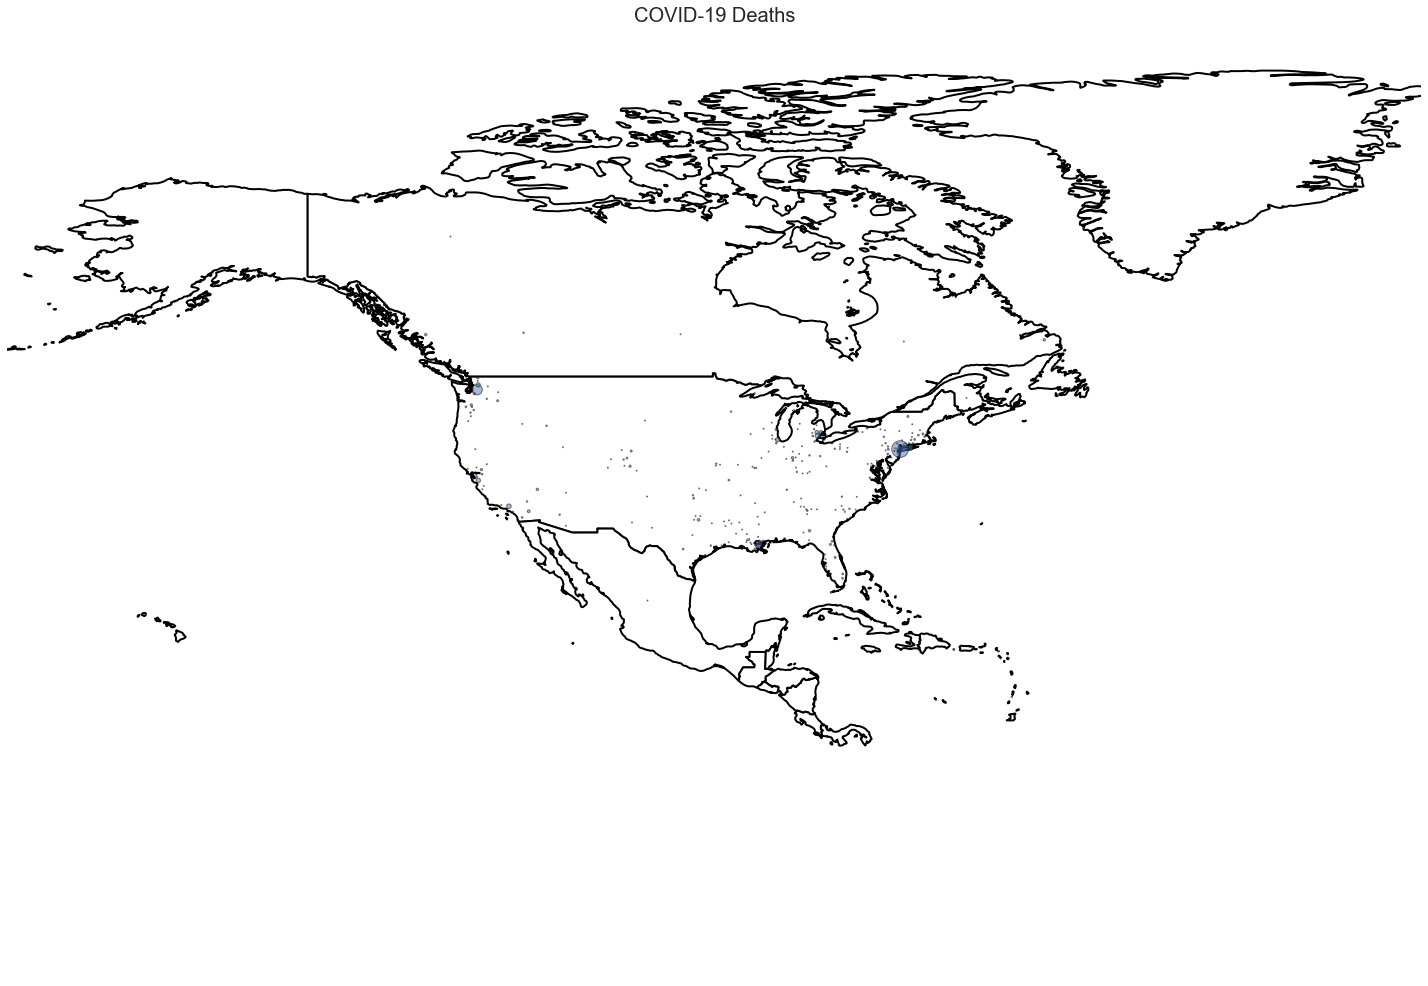

In [273]:
figsize=(20,20)
fig, ax = plt.subplots(figsize=figsize)
base = world_gdf.loc[world_gdf['CONTINENT'] == 'North America'].plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = world_covid_df.loc[world_covid_df['Country_Region'].isin(['US', 'Canada', 'Mexico'])].plot(markersize=world_covid_df['Deaths'], edgecolor='black', alpha=0.5, ax=ax)
_ = ax.axis('off')
ax.set_title('COVID-19 Deaths', fontsize=20)
min_lon=-175; max_lon=-15
ax.set_xlim([min_lon, max_lon])
plt.tight_layout()

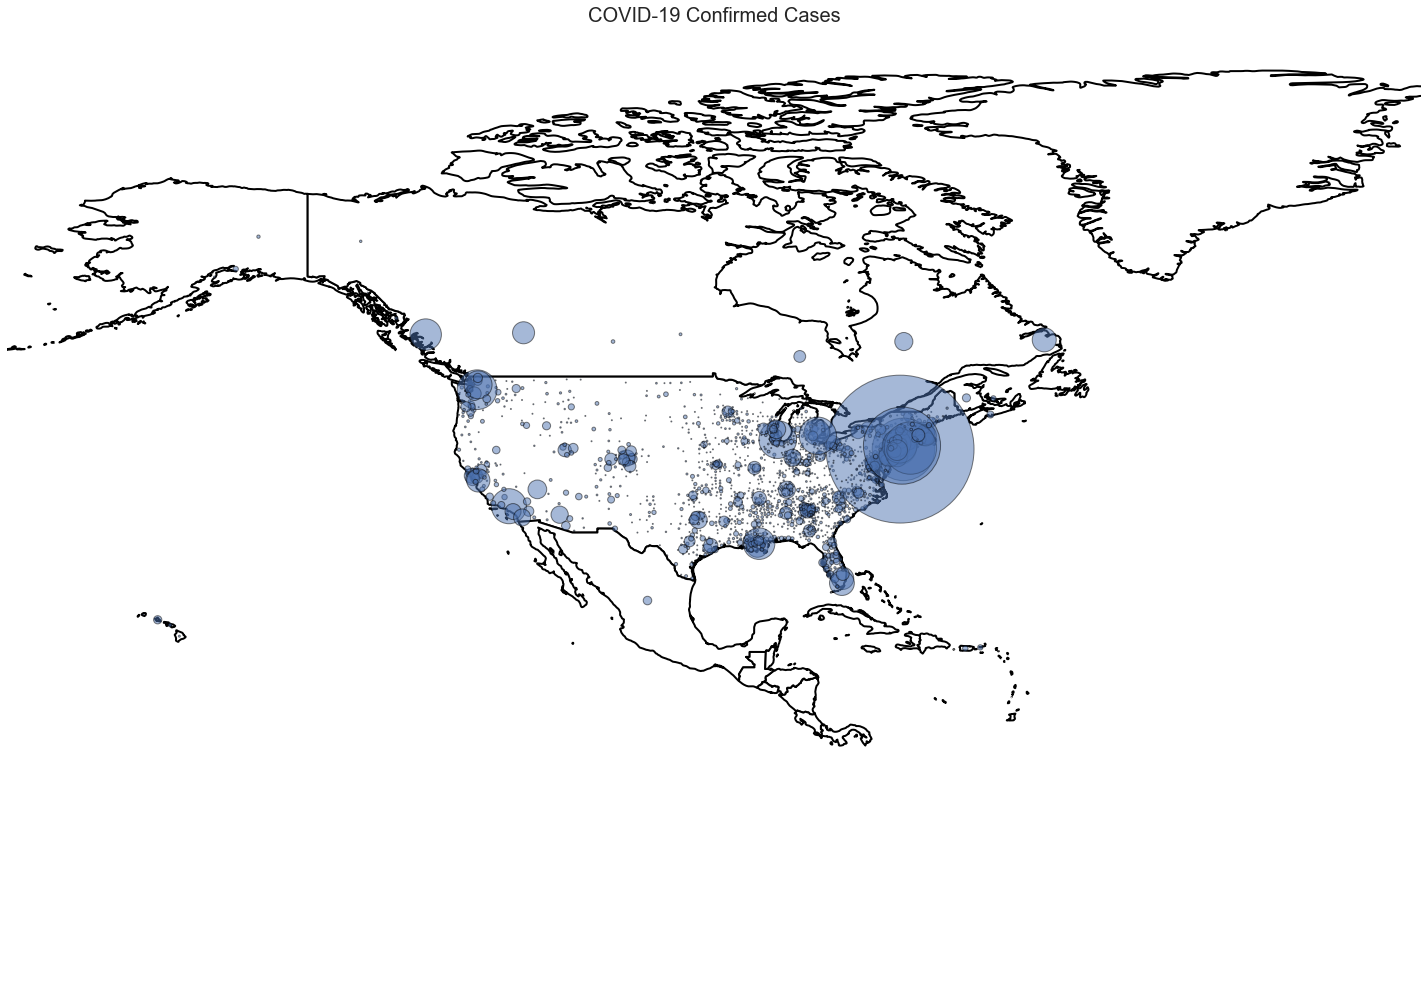

In [274]:
figsize=(20,20)
fig, ax = plt.subplots(figsize=figsize)
base = world_gdf.loc[world_gdf['CONTINENT'] == 'North America'].plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = world_covid_df.loc[world_covid_df['Country_Region'].isin(['US', 'Canada', 'Mexico'])].plot(markersize=world_covid_df['Confirmed'], edgecolor='black', alpha=0.5, ax=ax)
_ = ax.axis('off')
ax.set_title('COVID-19 Confirmed Cases', fontsize=20)
min_lon=-175; max_lon=-15
ax.set_xlim([min_lon, max_lon])
plt.tight_layout()